# INTERFACE COM PYTHON

Aqui estão alguns pontos que diferem Julia e Python. 

- Os índices de uma matriz/vetor em Julia começam a partir de 1, como Fortran e R, em Python começa em 0
- Como Python e muitas outras linguagens de script, Julia usa `#` para comentários de uma linha. Ela também permite usar `# = = e #` para comentários multi-linha, como `/* e */` no C.
- Funções terminam com `"end"` ao contrário de Python que não há necessidade de usar.
- Os blocos são recuados como em Python, mas não há nenhuma vírgula no final da primeira linha, e não existe uma instrução final para fechar o bloco.
- Julia usa `elseif` tal como Perl, Python usa `elif`.
- Julia usa colchetes para declarar um dicionário, vetores e matrizes. Python usa `vector([])` para vetores, `matrix([])` para matrizes e `{'key': valor}` para dicionários.
- Julia, assim como Python 3, retorna 2.5 quando executado 5/2.
- O número `3 + 4i` complexo será exibido `3 + 4im`  em Julia e `3 + 4j` em Python.
- Em Julia um String é contido entre aspas duplas. Python pode usar aspas duplas ou simples.
- Julia usa o nome `"function"` para definir uma função, semelhante ao JavaScript e R, Python usa `"def"`.
- Você pode acessar o último elemento de uma matriz com `"end"`, não com -1 como em Perl e Python.

Adaptado de: [Julia for Python programmers](http://www.johndcook.com/blog/2015/09/15/julia-for-python-programmers)

Julia permite utilizar os pacotes de Python e suas bibliotecas de forma prática através da chamada `PyCall`. A maneira mais fácil para trabalhar com `PyCall` é deixar o `Conda.jl` gerenciar os pacote do `Python` independentemente das versões instaladas em seu sistema:
```julia
ENV["PYTHON"]=""
Pkg.build("PyCall")
# isto será feito apenas uma vez, e será lembrado nas outras utilizações.
```
Caso queira usar sua própria versão do Python instalado no sistema (melhor opção caso use o anaconda) , informe o PATH (ex: `/home/jmarcellopereira/anaconda2/bin/python2.7`) como descrito abaixo:
```julia
ENV["PYTHON"] = "diretorio no qual python está instalado"
Pkg.build("PyCall")
```
OBS: É importante somente este `notebook` funcionando para que o processo ocorra bem. Caso ocorra erro do tipo: `"LOCKERROR: It looks like conda is already doing something."`  Encerre os outros notebooks e execute o comando novamente.

In [1]:
ENV["PYTHON"]="/home/jmarcellopereira/anaconda2/bin/python2"
Pkg.build("PyCall")

INFO: Building PyCall
INFO: PyCall is using /home/jmarcellopereira/anaconda2/bin/python2 (Python 2.7.12) at /home/jmarcellopereira/anaconda2/bin/python2, libpython = /home/jmarcellopereira/anaconda2/lib/libpython2.7


Para importar um módulo do Python use a sintaxe:
```julia
@pyimport modulo as nome
```

## UTILIZANDO NUMPY E SYMPY

`NumPy` é um módulo de extensão de Python que fornece uma operação eficiente em matrizes de dados homogêneos. Ele permite que python trabalhe a manipulação de dados numéricos. `SciPy` é um conjunto de ferramentas científicas e numéricos para Python de código aberto (licença BSD). Atualmente ele suporta funções especiais, integração, calculo de equações diferenciais (ODE), otimização de gradiente, ferramentas de programação paralela, um compilador de expressão para C ++ para execução rápida, e outros.

### BIBLIOTECAS NUMPY

Sintaxe:
```julia
using PyCall
@pyimport numpy as nome_alias
```

**Interpolação linear unidimensional com NumPy**

In [65]:
using PyCall
@pyimport numpy as np

In [66]:
# dados
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.5, 1.0, 4.0, 6.0, 8.0, 8.5, 8.8, 9.0, 9.1, 9.2, 9.3];

In [67]:
# calcular valor para x = 5.5
np.interp(5.5, x, y)

8.65

In [68]:
xvals = 0:0.1:10
yinterp = np.interp(xvals, x, y);


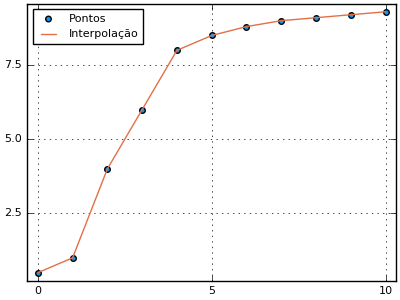

In [71]:
using Plots
pyplot()

scatter(x, y, label = "Pontos")
plot!(xvals, yinterp, label = "Interpolação", size = (400,300))

**Ajuste de curvas Polinomial com NumPy**

```julia
coeficientes_pol = numpy.polyfit(vetor_x, vetor_y, grau_polinomio)

nome_função_ajuste = numpy.poly1d(coeficientes_pol)
```

In [72]:
coeficientes_pol = np.polyfit(x, y, 5)
coeficientes_pol

6-element Array{Float64,1}:
 -0.00203526
  0.0573499 
 -0.569384  
  2.16782   
 -0.855679  
  0.438636  

In [76]:
# transformando os coeficientes em um polinômio
pol_ajuste = np.poly1d(coeficientes_pol)

PyObject poly1d([ -2.03525641e-03,   5.73499417e-02,  -5.69383741e-01,
         2.16782488e+00,  -8.55678904e-01,   4.38636364e-01])

In [77]:
# testando a função ajuste
pol_ajuste(0.5)

0.48510093422195993


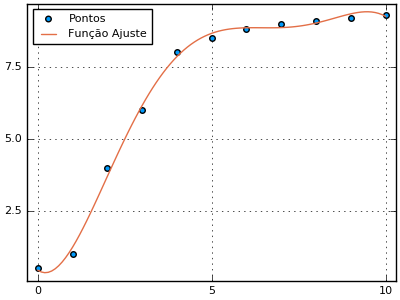

In [75]:
using Plots
pyplot()
xvals = 0:0.1:10

scatter(x, y, label = "Pontos")
plot!(xvals, pol_ajuste.(xvals), label = "Função Ajuste",  size = (400,300))

### BIBLIOTECAS SCIPY

Sintaxe:
```julia
using PyCall
@pyimport scipy.biblioteca as nome_alias
```
Bibliotecas Importantes:

- Funções especiais (scipy.special): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/special.html   
- Integração (scipy.integrate) :
- Optiização (scipy.optimize)  : https://docs.scipy.org/doc/scipy-0.14.0/reference/optimize.html#module-scipy.optimize 
- Interpolação (scipy.interpolate): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/interpolate.html
- Transformada de Fourier (scipy.fftpack): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html
- Processamento de sinais (scipy.signal): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/signal.html
- Algebra Linear (scipy.linalg)(: https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/linalg.html
- Rotinas de Gráficos Dispersos Compactados(scipy.sparse.csgraph): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/csgraph.html)
- estruturas de dados espaciais e algoritmos (scipy.spatial): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/spatial.html
- Estatísticas (scipy.stats):https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/stats.html
- processamento de imagem multidimensional (scipy.ndimage): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/ndimage.html
- Arquivo Entrada e Saída (scipy.io): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/io.html
- Ondas (scipy.weave): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/weave.html

**Raízes de uma Função**

Encontrar uma raiz usando o Newton-Raphson e método secante. Sintaxe:
```python
optimize.newton(funcao, x_inicial, df=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None)

```
obs: df é a derivada primeira da função, quando não passada o método da secante é utilizado

In [1]:
using PyCall
@pyimport scipy.optimize as sco

In [14]:
# cálculo da raiz utilizando o método de Newton
sco.newton(x -> x^2  -4 , 5)

2.0

**Sistemas de equações**

Calcula as raízes das equações lineares, não-lineares e sistemas de equações.

```python
optimize.fsolve(funcao_sistema, (var_1_inicial,..., var_n_inicial))
```
Sendo:
- funcao_sistema : função genérica contendo as equações
- (var_1_inicial,..., var_n_inicial): tupla ou vetor de dados iniciais

In [7]:
using PyCall
@pyimport scipy.optimize as sco

In [14]:
function sistema(xi_yi)
    x , y = xi_yi  # xi_yi pode ser uma tupla ou vetor de dados
    
    return x*y - 2*x^3, -x^2 + 8*y - 2
end

sistema (generic function with 2 methods)

In [18]:
sco.fsolve(sistema,(1,1))

2-element Array{Float64,1}:
 0.365148
 0.266667

Também é possível resolver uma equação não linear utilizando a função solve. Para isto, basta criar um sistema de equações no qual cada equação é dependente de apenas uma variável.

In [19]:
function equacao(xi_yi)
    x , y = xi_yi
    
    return -4 + x^2 + exp(x) , y 
end

equacao (generic function with 1 method)

In [20]:
# y indepedentemente do valor será sempre 0
sco.fsolve(equacao,(1.0,0))

2-element Array{Float64,1}:
 1.05801
 0.0    

**Integração Numérica**

Calcula a integral numérica de uma função. Sintaxe:
```python
integrate.quad(funcao, limite_inferior, limite_superior, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50))
```

In [26]:
using PyCall
@pyimport scipy.integrate as sci

In [10]:
sci.quad(x -> x^2 - 4, 0, 10)

(293.33333333333337,3.375663205707763e-12)

**Interpolação ScyPy**

In [83]:
using PyCall
@pyimport scipy.interpolate as scint

In [84]:
# dados discretos
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.5, 1.0, 4.0, 6.0, 8.0, 8.5, 8.8, 9.0, 9.1, 9.2, 9.3];

In [85]:
fic  = scint.interp1d(x, y, kind ="cubic")
fil  = scint.interp1d(x, y, kind = "linear")
fiq  = scint.interp1d(x, y, kind = "quadratic")
fisl = scint.interp1d(x, y, kind = "slinear")

PyObject <scipy.interpolate.interpolate.interp1d object at 0x7f82da5ca9f0>


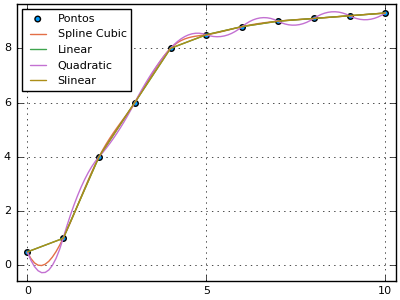

In [87]:
using Plots
pyplot()

xvals = 0:0.1:10

scatter(x, y, label = "Pontos")
plot!(xvals, fic(xvals), label  = "Spline Cubic")
plot!(xvals, fil(xvals), label  = "Linear")
plot!(xvals, fiq(xvals), label  = "Quadratic")
plot!(xvals, fisl(xvals), label = "Slinear", size = (400, 300))

## MATPLOTLIB

Em algumas ocasiões pode ser necessário utilizar um recurso que só existe no PyPlot da versão Python instalada no Computador.

In [62]:
using PyCall
@pyimport matplotlib.pyplot as plt

In [64]:
x = 1:100
y = sec(x).*x 
z = cos(x).*x 

plt.plot(x, y, color = "red" , linewidth = 2.0, linestyle = "-.")
plt.plot(x, z, color = "blue", linewidth = 1.0, linestyle = "-")
plt.show()

![](graf_matplotlib_pycall.png)

## BIBLIOTECAS SYMPY

Não é prático utilizar o `SymPy` via `PyCall` tendo em vista que já existe o pacote `SymPy.jl` que facilita e muito o trabalho, então este tópico está mais para uma demonstração da possibilidade de usar o `SymPy` via `PyCall`. Para efeturar qualquer cálculo simbólico é necessário utilizar o comando `pyeval("expressão_var", var_expressão = var_sympy_object)`. 

In [2]:
using PyCall            
@pyimport sympy as sp

x = sp.Symbol("x")
y = sp.Symbol("y")

PyObject y

In [5]:
pyeval("x*x",x = x)

PyObject x**2

In [91]:
# não é possível operar diretamente com objetos do tipo PyObject.
x*x

LoadError: LoadError: MethodError: no method matching *(::PyCall.PyObject, ::PyCall.PyObject)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:138
while loading In[91], in expression starting on line 2

**Raízes de equações e sistemas de equações com Solve e NSolve**

In [92]:
# Raiz da equação
sp.solve(pyeval("x**2 - 4", x = x), x)

2-element Array{Any,1}:
 PyObject -2
 PyObject 2 

In [93]:
# Raiz numérica
sp.nsolve(pyeval("x**2 - 4", x = x ), 5)

PyObject mpf('2.0')

In [94]:
# Sistema de equações
Sol = sp.solve([pyeval("x**2 - y", x = x, y = y),pyeval("y*2 - x", x = x, y = y)], [x,y])

2-element Array{Any,1}:
 (PyObject 0,PyObject 0)    
 (PyObject 1/2,PyObject 1/4)

In [108]:
# para calcular no tipo float
print("x1 e y1 :", float(Sol[1][1])," ", float(Sol[1][2]), " x2 e y2: ", float(Sol[2][1])," ", float(Sol[2][2]))

x1 e y1 :0.0 0.0 x2 e y2: 0.5 0.25